In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("data.xlsx")

c:\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [4]:
ColumnsNumeric = data.columns[-6:]
data[ColumnsNumeric] = data[ColumnsNumeric].apply(pd.to_numeric,errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376399 non-null  float64       
 2   Cyclone_Material_Temp     376128 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376398 non-null  float64       
 4   Cyclone_cone_draft        376399 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376398 non-null  float64       
 6   Cyclone_Inlet_Draft       376397 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.2 MB


In [5]:
data.isnull().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

Dealing with null values

In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 10)
data.iloc[:,-6:] = imputer.fit_transform(data.iloc[:,-6:])

In [7]:
data.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

Null values dealt

Cleaning the data, i.e; removing the duplicates if any

In [8]:
if data.duplicated().any():
    print("Duplicate rows exist")
else:
    print("No duplicate rows exist")

No duplicate rows exist


No more cleaning required


We will now proceed with data processing

In [9]:
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


Here we see the pressures are negative which is logically not possible hence we will correct them to make them positive.

In [10]:
print((data['Cyclone_Inlet_Draft']<0).sum())
print((data['Cyclone_Outlet_Gas_draft']<0).sum())
print((data['Cyclone_cone_draft']<0).sum())

352752
319565
353627


In [11]:
data[['Cyclone_Inlet_Draft','Cyclone_Outlet_Gas_draft','Cyclone_cone_draft']] = data[['Cyclone_Inlet_Draft','Cyclone_Outlet_Gas_draft','Cyclone_cone_draft']].abs() # Cnverting negatives  to positive values

Now we will look for any outliers that exist in these columns.

First we will normalize the the columns. 

In [12]:
data['Inlet_Temp_Normalized'] = (data['Cyclone_Inlet_Gas_Temp'] - data['Cyclone_Inlet_Gas_Temp'].min()) / (data['Cyclone_Inlet_Gas_Temp'].max() - data['Cyclone_Inlet_Gas_Temp'].min())
data['Outlet_Temp_Normalized'] = (data['Cyclone_Gas_Outlet_Temp'] - data['Cyclone_Gas_Outlet_Temp'].min()) / (data['Cyclone_Gas_Outlet_Temp'].max() - data['Cyclone_Gas_Outlet_Temp'].min())
data['Inlet_Pressure_Normalized'] = (data['Cyclone_Inlet_Draft'] - data['Cyclone_Inlet_Draft'].min()) / (data['Cyclone_Inlet_Draft'].max() - data['Cyclone_Inlet_Draft'].min())
data['Outlet_Pressure_Normalized'] = (data['Cyclone_Outlet_Gas_draft'] - data['Cyclone_Outlet_Gas_draft'].min()) / (data['Cyclone_Outlet_Gas_draft'].max() - data['Cyclone_Outlet_Gas_draft'].min())

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time                        377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp      377719 non-null  float64       
 2   Cyclone_Material_Temp       377719 non-null  float64       
 3   Cyclone_Outlet_Gas_draft    377719 non-null  float64       
 4   Cyclone_cone_draft          377719 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp     377719 non-null  float64       
 6   Cyclone_Inlet_Draft         377719 non-null  float64       
 7   Inlet_Temp_Normalized       377719 non-null  float64       
 8   Outlet_Temp_Normalized      377719 non-null  float64       
 9   Inlet_Pressure_Normalized   377719 non-null  float64       
 10  Outlet_Pressure_Normalized  377719 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memor

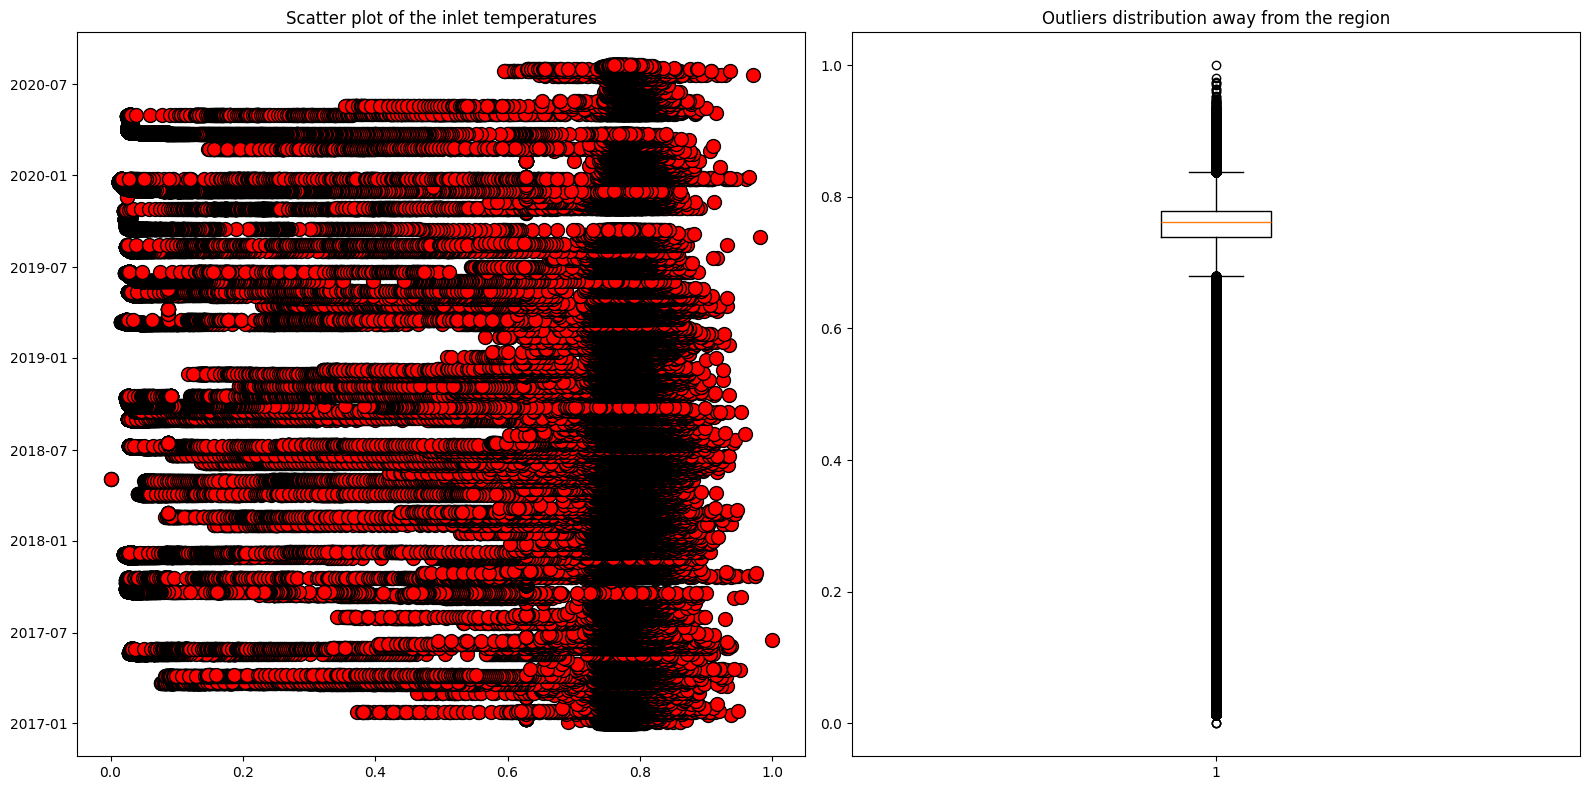

In [14]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)
      
ax1.scatter(x= data['Inlet_Temp_Normalized'],y = data['time'], c = 'red', edgecolors='black', s=100, marker='o')
ax1.set_title('Scatter plot of the inlet temperatures')
ax2.boxplot(x=data['Inlet_Temp_Normalized'])
ax2.set_title('Outliers distribution away from the region')

plt.tight_layout()

plt.show()

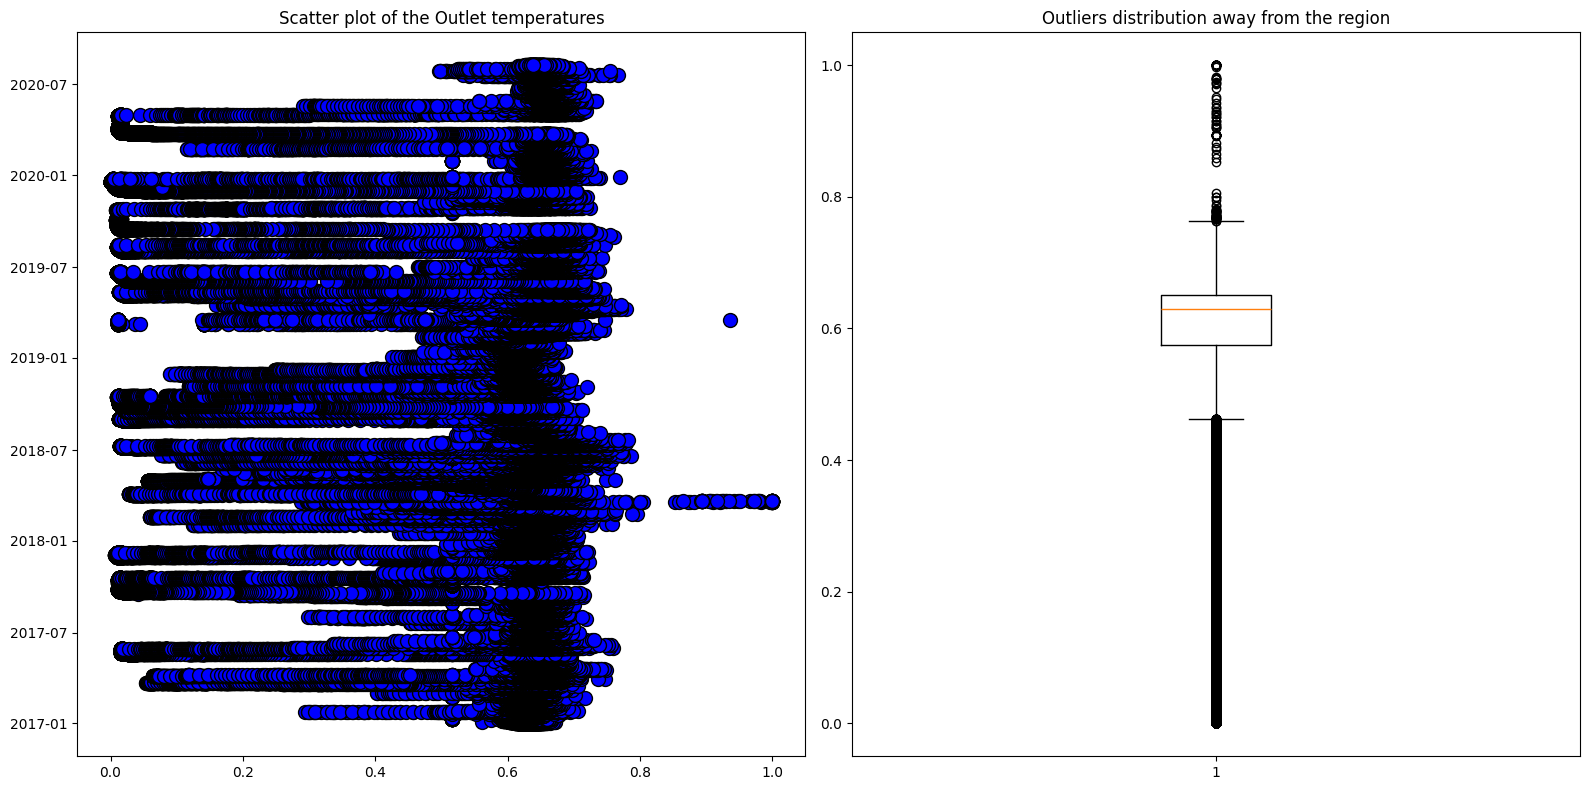

In [15]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)
      
ax1.scatter(x= data['Outlet_Temp_Normalized'],y = data['time'], c = 'blue', edgecolors='black', s=100, marker='o')
ax1.set_title('Scatter plot of the Outlet temperatures')
ax2.boxplot(x=data['Outlet_Temp_Normalized'])
ax2.set_title('Outliers distribution away from the region')

plt.tight_layout()

plt.show()

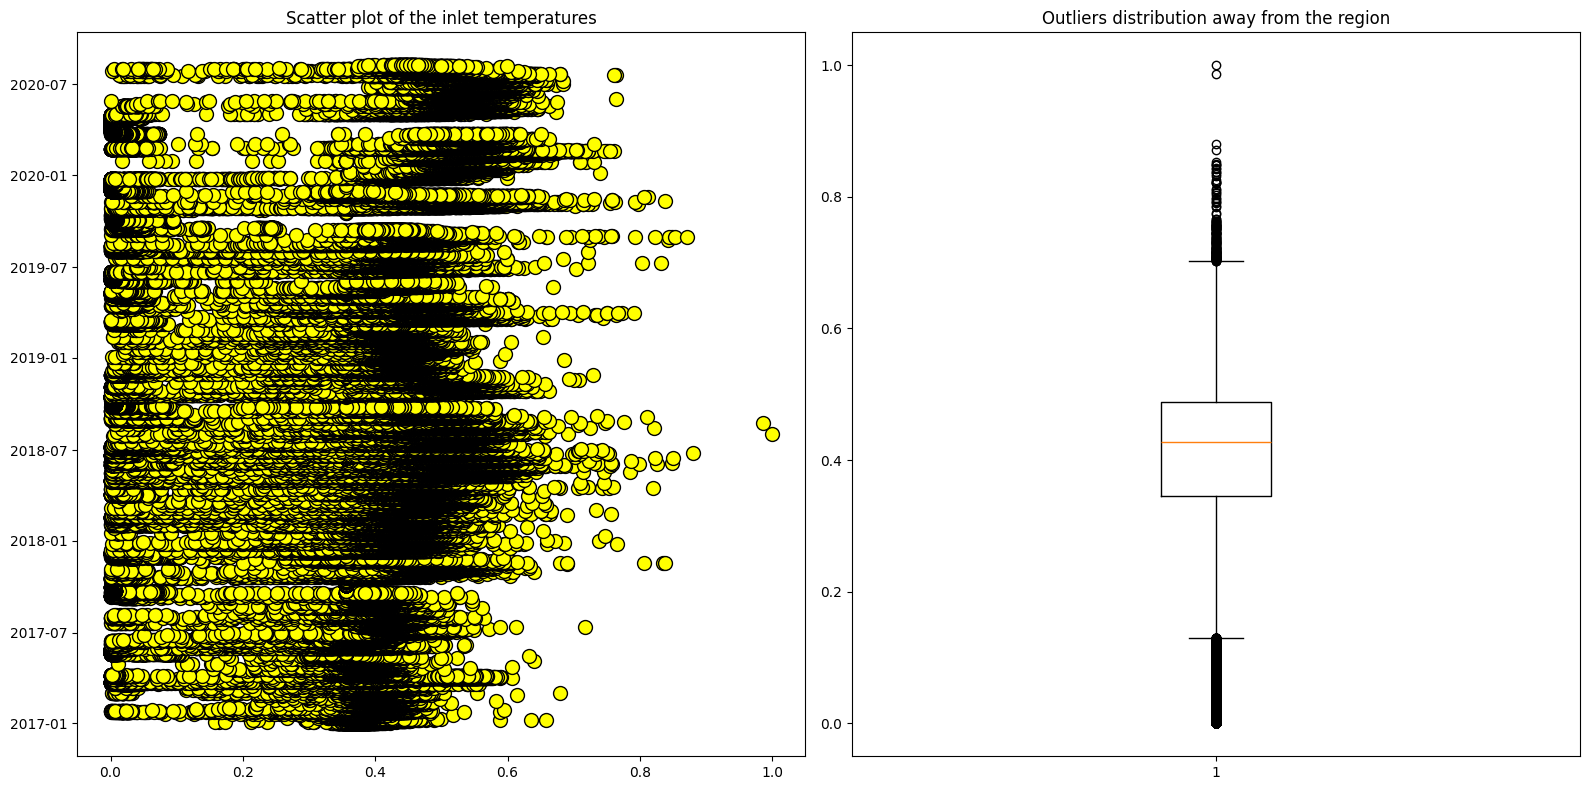

In [16]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)
      
ax1.scatter(x= data['Inlet_Pressure_Normalized'],y = data['time'], c = 'yellow', edgecolors='black', s=100, marker='o')
ax1.set_title('Scatter plot of the inlet temperatures')
ax2.boxplot(x=data['Inlet_Pressure_Normalized'])
ax2.set_title('Outliers distribution away from the region')

plt.tight_layout()

plt.show()

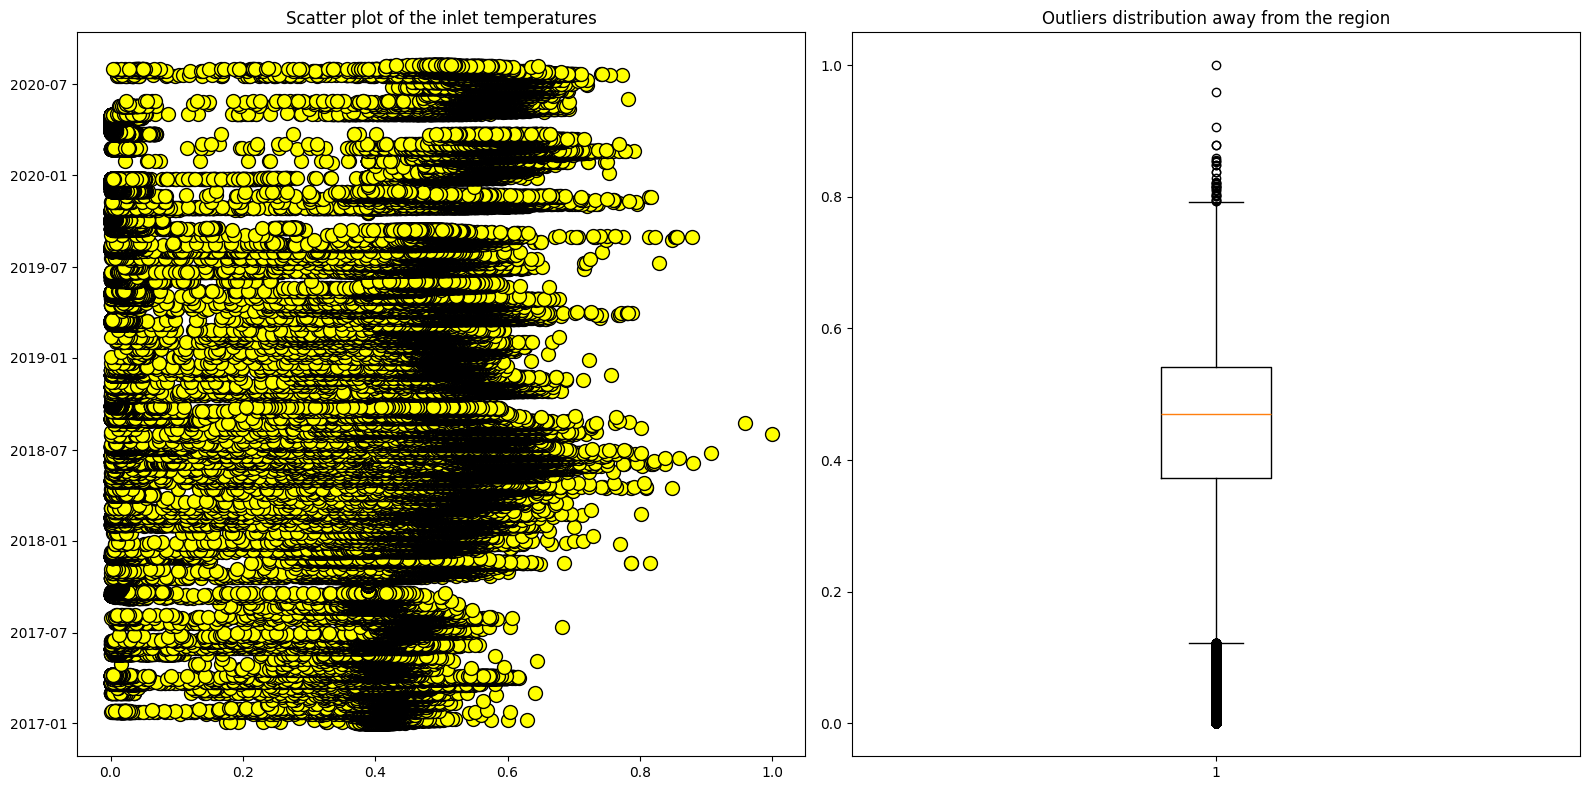

In [17]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)
      
ax1.scatter(x= data['Outlet_Pressure_Normalized'],y = data['time'], c = 'yellow', edgecolors='black', s=100, marker='o')
ax1.set_title('Scatter plot of the inlet temperatures')
ax2.boxplot(x=data['Outlet_Pressure_Normalized'])
ax2.set_title('Outliers distribution away from the region')

plt.tight_layout()

plt.show()

Looking at the above outliers, it is clear that these outliers are not a mistake but represents a pattern.

The inlet and outlet temperatures get reduced once to lower temperatures every quarte of the year i.e; per every 3 months.

Now that we understood that these variations in temperature shows a pattern, we will proceed towards feature extraction.

In [18]:
data['Inlet_Outlet_Temp_Diff'] = data['Cyclone_Inlet_Gas_Temp'] - data['Cyclone_Gas_Outlet_Temp']
data['Pressure_Drop'] = data['Cyclone_Inlet_Draft'] - data['Cyclone_Outlet_Gas_draft']

We can also find out the volume of gas that has been filtered through  the cyclone seperator between the duuration of every 5 min that has given. This will be done using DOMAIN SPECIFIC KNOWLEDGE.

In [19]:
def volume(It1, Ip1, Ot1, Op1, It2, Ip2, Ot2, Op2, t = 300):
    """
    It1: Inlet temperature at time 0 (Kelvin)
    Ip1: Inlet pressure at time 0 (Pa)
    Ot1: Outlet temperature at time 0 (Kelvin)
    Op1: Outlet pressure at time 0 (Pa)
    It2: Inlet temperature at time t (Kelvin)
    Ip2: Inlet pressure at time t (Pa)
    Ot2: Outlet temperature at time t (Kelvin)
    Op2: Outlet pressure at time t (Pa)
    """
    It1 = It1+273.15
    It2 = It2+273.15
    inlet_initial_volume = It1 / Ip1
    inlet_final_volume = It2 / Ip2
    outlet_initial_volume = Ot1 / Op1
    outlet_final_volume = Ot2 / Op2

    # Calculate the volume of gas filtered
    # The volume filtered can be adjusted based on the flow rates
    V_filtered_inlet = (inlet_final_volume - inlet_initial_volume)
    V_filtered_outlet = (outlet_final_volume - outlet_initial_volume)
    volume = V_filtered_inlet - V_filtered_outlet





    return volume




The above function might not be fully correct as their are other terms needed to calculate the exact volume too.

In [20]:
data['volume'] = nm.nan

In [21]:
data.loc[0, 'volume'] = 0

In [22]:
data_length = len(data)
for i in range(1, data_length):
    It1, It2 = data.loc[i-1,'Cyclone_Inlet_Gas_Temp'], data.loc[i,'Cyclone_Inlet_Gas_Temp']
    Ot1, Ot2 = data.loc[i-1,'Cyclone_Gas_Outlet_Temp'], data.loc[i,'Cyclone_Gas_Outlet_Temp']
    Ip1, Ip2 = data.loc[i-1,'Cyclone_Inlet_Draft'], data.loc[i,'Cyclone_Inlet_Draft']
    Op1, Op2 = data.loc[i-1,'Cyclone_Outlet_Gas_draft'], data.loc[i,'Cyclone_Outlet_Gas_draft']
    data.loc[i,'volume'] = volume(It1, Ip1, Ot1, Op1, It2, Ip2, Ot2, Op2)

    if (i%10000) == 0:
        print(f'{i+1}/{data_length}')
    

10001/377719
20001/377719


C:\Users\ankit\AppData\Local\Temp\ipykernel_18196\2661779486.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  outlet_final_volume = Ot2 / Op2
C:\Users\ankit\AppData\Local\Temp\ipykernel_18196\2661779486.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  outlet_initial_volume = Ot1 / Op1


30001/377719
40001/377719


C:\Users\ankit\AppData\Local\Temp\ipykernel_18196\2661779486.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  inlet_final_volume = It2 / Ip2
C:\Users\ankit\AppData\Local\Temp\ipykernel_18196\2661779486.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  inlet_initial_volume = It1 / Ip1


50001/377719
60001/377719
70001/377719
80001/377719
90001/377719
100001/377719
110001/377719
120001/377719
130001/377719
140001/377719
150001/377719
160001/377719
170001/377719
180001/377719
190001/377719
200001/377719
210001/377719
220001/377719
230001/377719
240001/377719
250001/377719
260001/377719
270001/377719
280001/377719
290001/377719
300001/377719


C:\Users\ankit\AppData\Local\Temp\ipykernel_18196\2661779486.py:21: RuntimeWarning: invalid value encountered in scalar subtract
  V_filtered_inlet = (inlet_final_volume - inlet_initial_volume)
C:\Users\ankit\AppData\Local\Temp\ipykernel_18196\2661779486.py:22: RuntimeWarning: invalid value encountered in scalar subtract
  V_filtered_outlet = (outlet_final_volume - outlet_initial_volume)
C:\Users\ankit\AppData\Local\Temp\ipykernel_18196\2661779486.py:23: RuntimeWarning: invalid value encountered in scalar subtract
  volume = V_filtered_inlet - V_filtered_outlet


310001/377719
320001/377719
330001/377719
340001/377719
350001/377719
360001/377719
370001/377719


Text(0, 0.5, 'time')

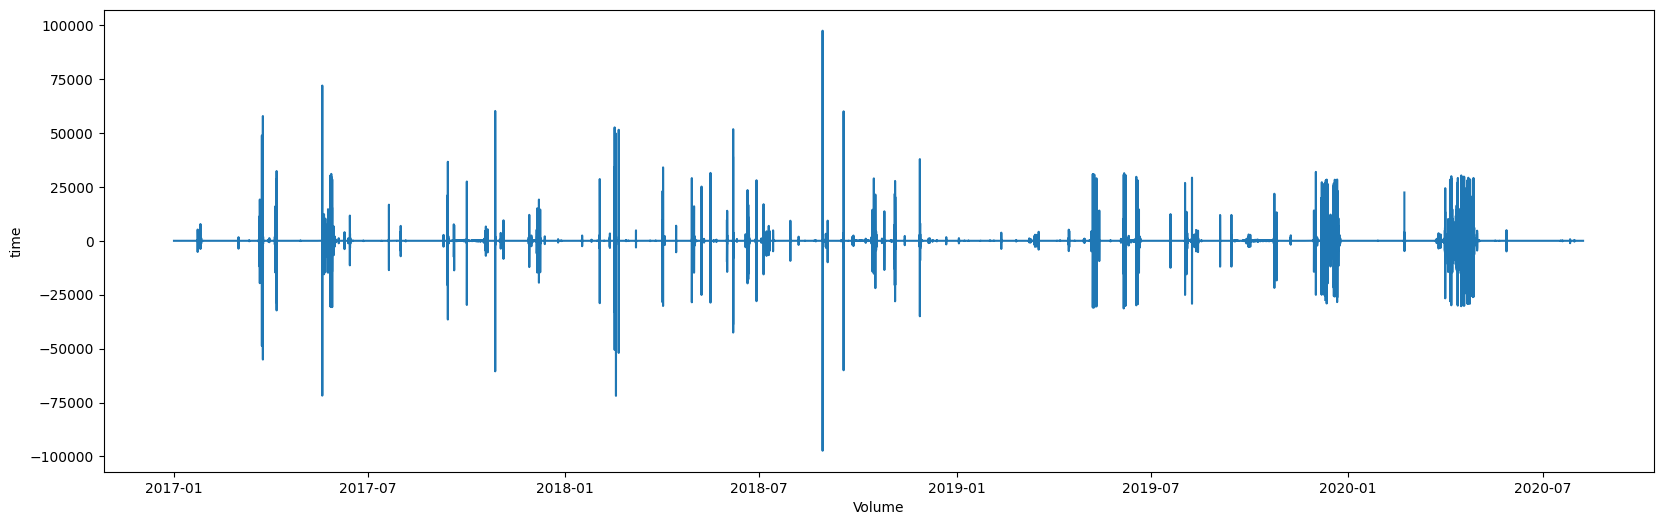

In [23]:
plt.figure(figsize=(20, 6)) 
plt.plot(data['time'],data['volume'])
plt.xlabel('Volume')
plt.ylabel('time')


In [31]:
data.to_csv('DATA.csv')